In [1]:
import networkx as nx
import numpy as np
from simulation import Simulation
import matplotlib.pyplot as plt
import random

In [2]:
def gen_exp_graph(N, gamma):
    """
    Returns a networx graph according to a power law degree distribution
    """
    sum_is_odd = True

    while sum_is_odd:
        sequence = np.random.poisson(gamma, N)
        sum_is_odd = sum(sequence) % 2 == 1

    return nx.configuration_model(sequence)



In [3]:
graphs = []
n_graphs = 10


for i in range(n_graphs):
    gamma = 2.0 + 0.5 / n_graphs * i
    print(gamma)
    
    G = gen_exp_graph(100, gamma)

    graphs.append(G)

2.0
2.05
2.1
2.15
2.2
2.25
2.3
2.35
2.4
2.45


In [4]:
def compute_B(G, D_I, beta, mu):
    N = G.number_of_nodes()
    B = np.zeros((N,N))
    A = nx.to_numpy_array(G)
    degs = np.array([d for v, d in G.degree()])
    avg_deg = np.average(degs)
    for i in range(N):
        for j in range(N):
            eq = int(i == j)
            B[i,j] += eq * ((beta * N) / (avg_deg * N) * degs[i] - mu - D_I)
            if degs[j] != 0:
                B[i,j] += (1- eq) * D_I * A[j,i] / degs[j]
    return B

In [5]:
Bs = []
D_S = 1.0
D_I = 0.1
beta = 1 / 1000
mu = 1 / 10

min_eig = np.inf
max_eig = -np.inf

G_1 = None
G_2 = None

for i in range(n_graphs):
    B = compute_B(graphs[i], D_I, beta, mu)
    eig, _ = np.linalg.eig(B)
    eig_max = np.max(eig)

    if eig_max < min_eig:
        min_eig = eig_max
        G_1 = graphs[i]

    if eig_max > max_eig:
        max_eig = eig_max
        G_2 = graphs[i]


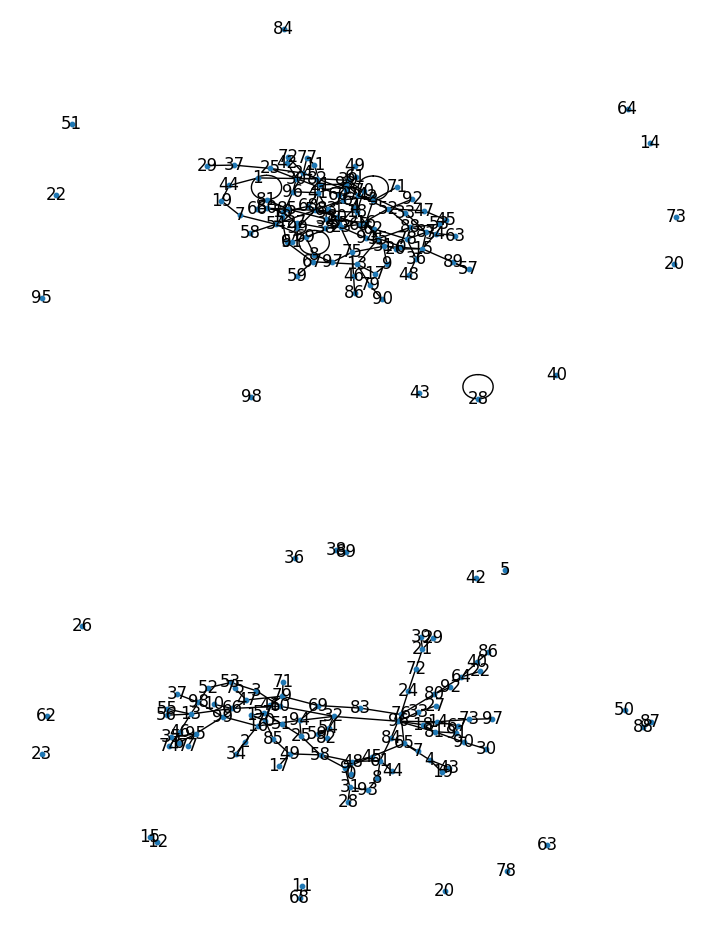

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 12))

nx.draw(G_1, node_size = 10, with_labels = True, ax = ax1)
nx.draw(G_2, node_size = 10, with_labels = True, ax = ax2)

In [7]:
# all walkers start at node 10
sim_1 = Simulation(G_1, D_S, D_I, beta, mu)\
    .init_walkers_uniform(5000)\
    .infect_walkers(0.01)\
    .run(10)

TypeError: Simulation.init_walkers_uniform() missing 1 required positional argument: 'n_walkers'

In [7]:
# all walkers start at random nodes (uniformly distributed)
sim2 = Simulation(10000, G, 0.1, 200)
sim2.run()


In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

Text(0, 0.5, 'Fraction of walkers')

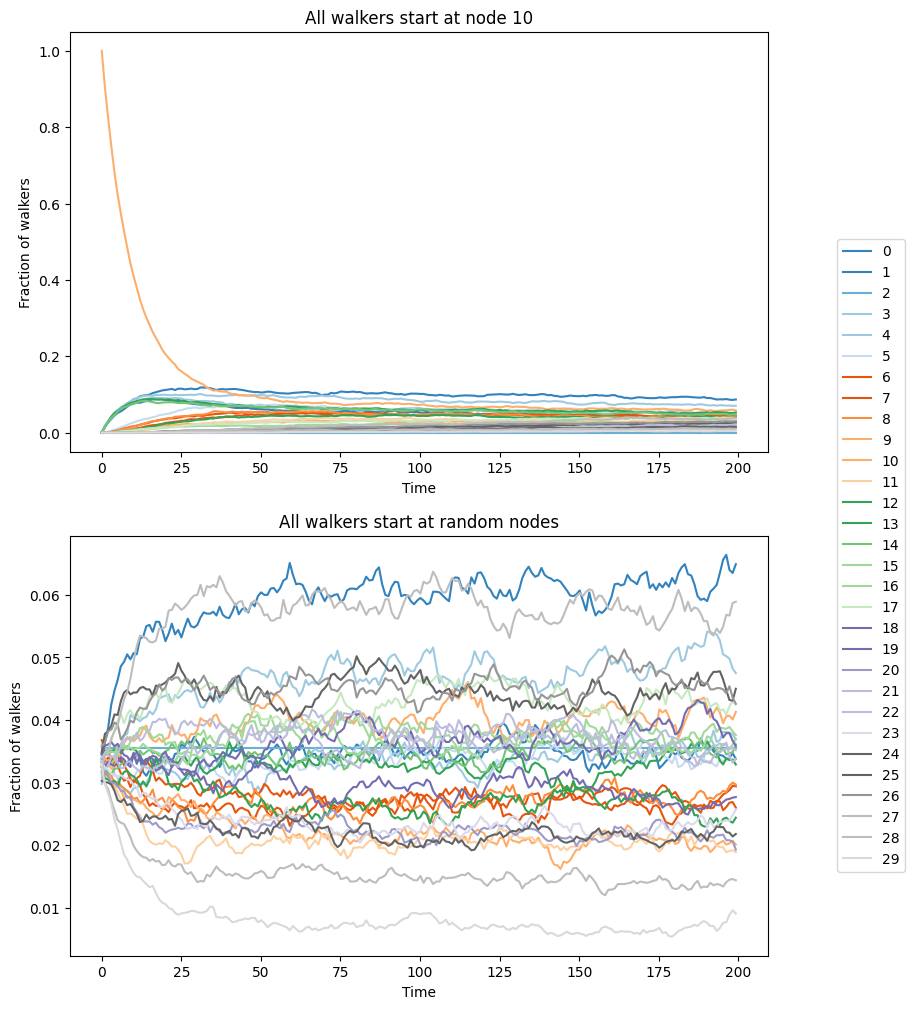

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 12))

jet = cm = plt.get_cmap('tab20c') 
cNorm  = colors.Normalize(vmin=0, vmax=sim2.G.number_of_nodes())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

for i in range(0, sim1.G.number_of_nodes(), 1):
    color_val = scalarMap.to_rgba(i)
    ax1.plot(sim1.timeline, sim1.node_log[:,i]/sim1.n_walkers, label=i, color=color_val)

ax1.set_title('All walkers start at node 10')
ax1.set_xlabel('Time')
ax1.set_ylabel('Fraction of walkers')

for i in range(0, sim2.G.number_of_nodes(), 1):
    color_val = scalarMap.to_rgba(i)
    ax2.plot(sim2.timeline, sim2.node_log[:,i]/sim2.n_walkers, label=i, color=color_val)

ax1.legend(np.linspace(0, sim1.G.number_of_nodes()-1, sim1.G.number_of_nodes(), dtype=int), loc=(1.1, -1))
ax2.set_title('All walkers start at random nodes')
ax2.set_xlabel('Time')
ax2.set_ylabel('Fraction of walkers')

